In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/oam_pheno/dijet_dsa')
import dsa_mc.dijet as dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 16  
plt.rcParams["xtick.labelsize"] = 14  
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [75]:
# get spectra of dsa

kins = {}
kins['lowQ'] = dijet.Kinematics(Q=np.sqrt(10), z=0.4, x=0.01, delta=0.2, phi_Dp=0.0, phi_kp=0.0, s=90**2)
kins['highQ'] = dijet.Kinematics(Q=8.0, z=0.4, x=0.01, delta=0.2, phi_Dp=0.0, phi_kp=0.0, s=90**2)

for var in kins:
    kins[var].y = (kins[var].Q**2)/(kins[var].s * kins[var].x)
    if kins[var].y > 1: raise ValueError(f'y = {kins[var].y} > 1')

xis = [0, 0.2, 0.5, 1.0]
djs = {}
dsa_data = {}
for xi in xis:
    djs[xi] = dijet.DIJET(fit_type='pp', constrained_moments=True, gauss_param=xi, lambdaIR=0.33333333333)

    dsa_data[xi] = {}
    for Q_var in ['lowQ', 'highQ']:
        dsa_data[xi][Q_var] = {}
        for var in ['num', 'den']:
            dsa_data[xi][Q_var][var] = []


pT_values = np.linspace(1, 10, 100) 

for xi in xis:
    for Q_var in ['lowQ', 'highQ']:
        for pT in pT_values:
    
            kins[Q_var].pT = pT
            dsa_data[xi][Q_var]['num'].append(djs[xi].get_xsec(kins[Q_var], kind='num'))
            dsa_data[xi][Q_var]['den'].append(djs[xi].get_xsec(kins[Q_var], kind='den'))
    
     

--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 1
--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 1
--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 1
--> !!! Using constrained moment parameters!
--> loaded un

In [76]:

# make kinematics text
info_text = {var: '' for var in ['lowQ', 'highQ']}

for var in ['lowQ', 'highQ']:
    info_text[var] = fr'$\sqrt{{s}} \, = \,{round(np.sqrt(kins[var].s), 2)}\, \mathrm{{GeV}}$' + '\n'
    info_text[var] += fr'$Q^2 \, = \,{round(kins[var].Q**2, 2)}\, \mathrm{{GeV^2}}$' + '\n'
    info_text[var] += fr'$x \, = \,{round(kins[var].x, 3)}$' + '\n'
    info_text[var] += fr'$t \, = \,{round(kins[var].delta**2, 2)}\, \mathrm{{GeV^2}}$' + '\n'
    info_text[var] += fr'$z \, = \,{round(kins[var].z, 3)}$' + '\n'
    info_text[var] += fr'$\phi_{{\Delta p}} \, = \,{round(kins[var].phi_Dp, 2)}$' + '\n'
    info_text[var] += fr'$\phi_{{k p}} \, = \,{round(kins[var].phi_kp, 2)}$'


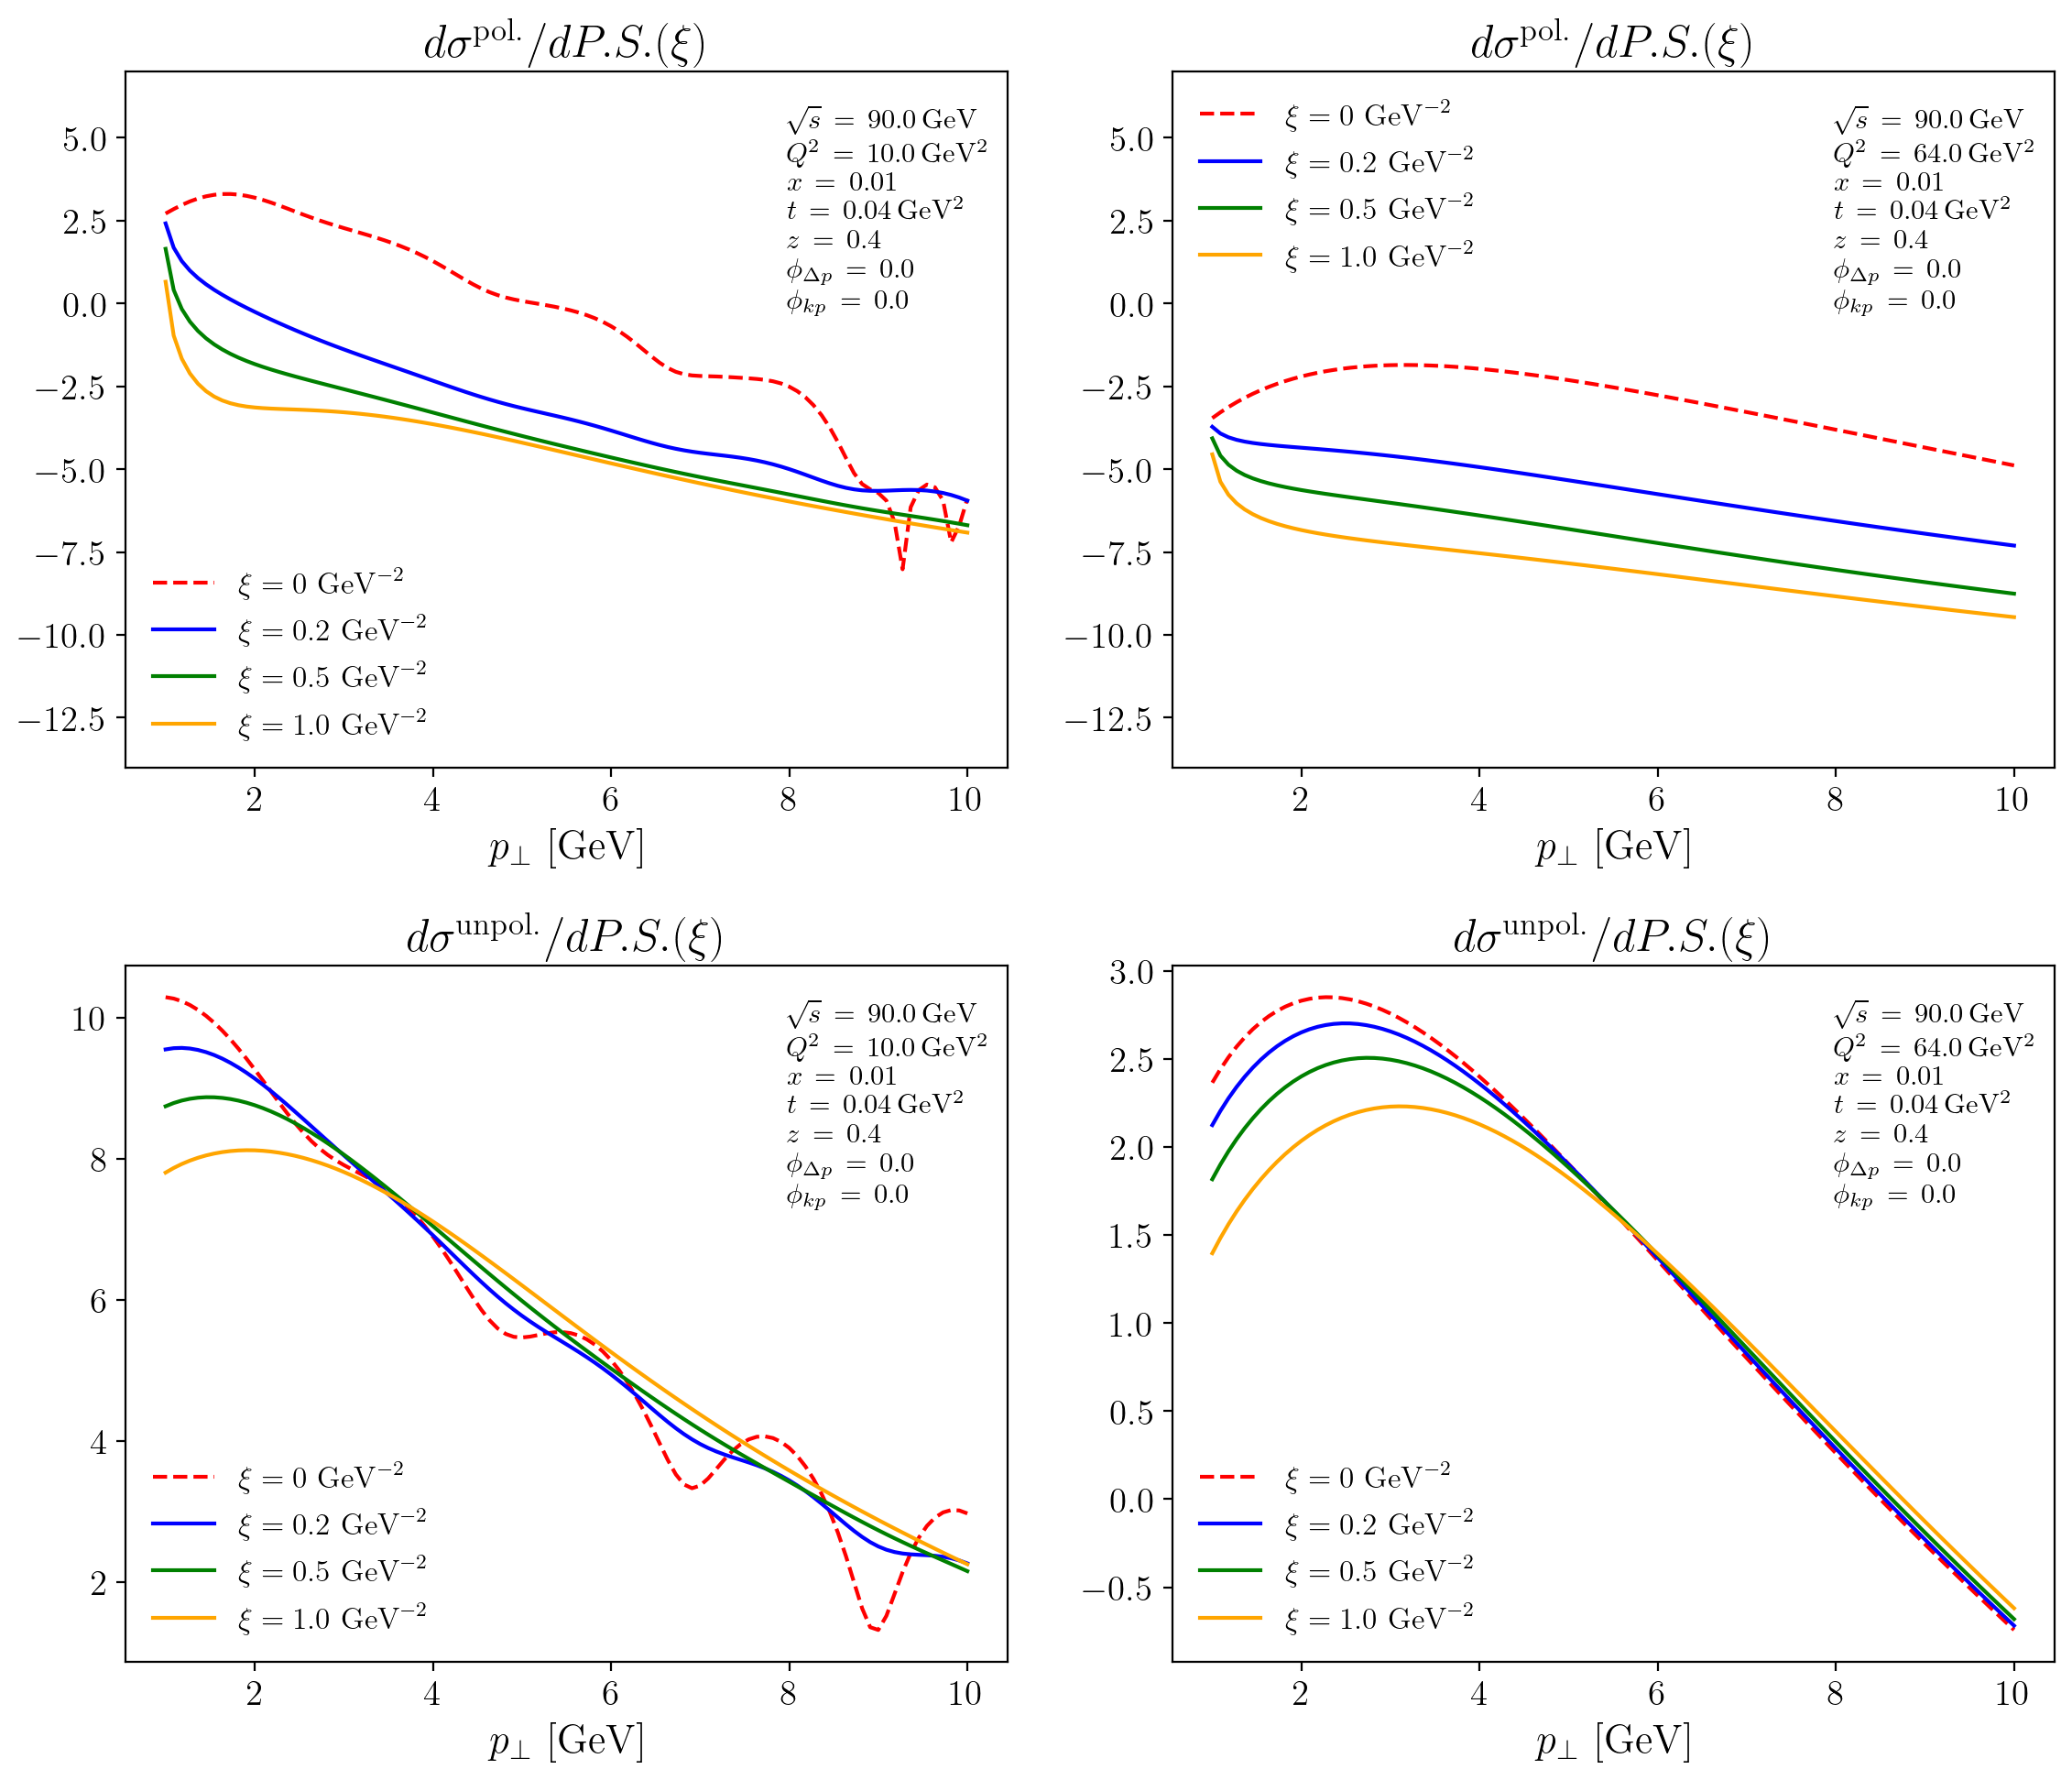

In [77]:

asp_ratio = 3.5/3
psize = 5
nrows, ncols = 2, 2
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

colors = ['red', 'blue', 'green', 'orange', 'black']
linestyles = ['--', '-', '-', '-', '-']
for ixi, xi in enumerate(xis):
    for iQ_var, Q_var in enumerate(['lowQ', 'highQ']):
        for ivar, var in enumerate(['num', 'den']):
            ax[ivar, iQ_var].plot(pT_values, np.log(np.abs(dsa_data[xi][Q_var][var])), label = fr'$\xi = {xi}\,\, \mathrm{{GeV}}^{{-2}}$', color=colors[ixi], linestyle=linestyles[ixi])

for i, var in enumerate(['lowQ', 'highQ']):
    ax[0, i].set_xlabel(r'$p_\perp \,\, [\mathrm{GeV}]$')
    ax[0, i].set_title(r'$ d\sigma^{\mathrm{pol.}} / d P.S. (\xi)$')
    # ax[0].semilogy()
    ax[0, i].text(
        0.75, 0.65, info_text[var], 
        transform=ax[0, i].transAxes,
        ha='left', va='bottom', 
        fontsize=11, wrap=True, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='none')
    )
    ax[0, i].legend(frameon=False)
    ax[0, i].set_ylim([-14, 7])

    ax[1, i].set_xlabel(r'$p_\perp \,\, [\mathrm{GeV}]$')
    ax[1, i].set_title(r'$ d\sigma^{\mathrm{unpol.}} / d P.S. (\xi)$')
    # ax[1].semilogy()
    ax[1, i].text(
        0.75, 0.65, info_text[var], 
        transform=ax[1, i].transAxes,
        ha='left', va='bottom', 
        fontsize=11, wrap=True, 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='none')
    )
    ax[1,i].legend(frameon=False)

plt.tight_layout()
plt.show()


# fig.savefig(f"IR_regs{tag}.png")


